<a href="https://colab.research.google.com/github/AguaClara/CEE4520/blob/master/Unit_Process_Designs/Flocculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flocculation Design Challenge

Learn how to use the AguaClara code distribution and python to design a flocculator!
The [AguaClara code documentation](https://aguaclara.github.io/aguaclara/index.html) will be helpful as you search for useful functions.

30 points total
* 3 for style
* 27 for questions

In [1]:
!pip install aguaclara

     |████████████████████████████████| 102kB 3.5MB/s 
     |████████████████████████████████| 215kB 8.0MB/s 
     |████████████████████████████████| 2.1MB 36.8MB/s 
     |████████████████████████████████| 112kB 39.6MB/s 
     |████████████████████████████████| 552kB 32.3MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.7-cp36-none-any.whl size=106170 sha256=dc37861644f10543d44b2ff4a0c92ebd8d296c0b6fd7ff751ea90ad66258ee02
  Stored in directory: /root/.cache/pip/wheels/a8/c0/05/598274ddc81c1f6b338993cbd893a1a23aef900293bdc407ed
Successfully built aguaclara


In [2]:
import aguaclara as ac
from aguaclara.core.units import unit_registry as u
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import matplotlib.ticker as ticker

font = 'x-large'
params = {'legend.fontsize': font,
         'figure.figsize': (8,6),
         'axes.labelsize': font,
         'axes.titlesize':font,
         'xtick.labelsize':font,
         'ytick.labelsize':font,
         'axes.formatter.useoffset':False,
          'legend.framealpha':1} 
plt.rcParams.update(params)

Calculate minor loss coefficient for flow around baffles when H/s is small enough so that there is not complete expansion of the flow before the flow contracts again.

0.3919 meter
0.7721 centimeter
Baffle K is 4.008 dimensionless
max H/s is 5.306896551724137


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


5.333333333333332 meter

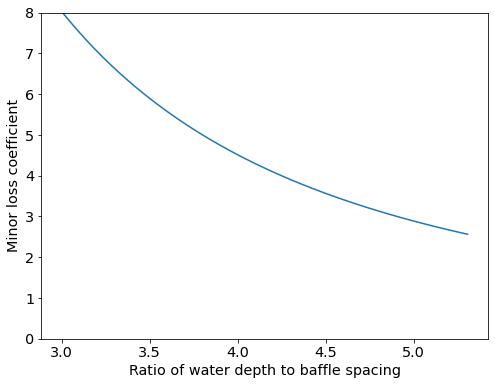

In [3]:
venacontracta = 0.62
ratio_plane_jet_width = 0.116

ratio_vc_baffle = venacontracta**2
height_e = (2.32 - 0.14 - 0.1) * u.m
w_chan = 0.63 * u.m
w_e = ratio_plane_jet_width * height_e/(1 - ratio_vc_baffle)
print(w_e)
q = 60 * u.L/u.s
def Baffle_hl(q,height_e,w_chan,ratio_vc_baffle,ratio_plane_jet_width):
  a = (q/w_chan)**2 / (2 * u.gravity)
  b = (1-ratio_vc_baffle)**2
  c = ratio_vc_baffle * ratio_plane_jet_width*height_e
  return (a * ( b / c )**2).to(u.cm)


baffle_hl = Baffle_hl(q,height_e,w_chan,ratio_vc_baffle,ratio_plane_jet_width)
print(baffle_hl)
baffle_s = 49 * u.cm
ratio_h_s = height_e/baffle_s

@ac.list_handler()
def baffle_k_e(ratio_vc_baffle,ratio_plane_jet_width,ratio_h_s):
  a = (1-ratio_vc_baffle)**2
  b = ratio_vc_baffle * ratio_plane_jet_width * ratio_h_s
  return ((a/b)**2).to(u.dimensionless)

G_1_baffle_K = baffle_k_e(ratio_vc_baffle,ratio_plane_jet_width,ratio_h_s)
print('Baffle K is',G_1_baffle_K) 

# max value of H/s - point of full expansion
ratio_h_s_max = (1 - ratio_vc_baffle)/ratio_plane_jet_width
print('max H/s is',ratio_h_s_max)

h_s_graph = np.linspace(3,ratio_h_s_max) * u.dimensionless

plt.plot(h_s_graph,baffle_k_e(ratio_vc_baffle,ratio_plane_jet_width,h_s_graph))
plt.xlabel('Ratio of water depth to baffle spacing')
plt.ylabel('Minor loss coefficient')
plt.ylim(0,8)

height_e/0.39

Gracias new baffle design
Primer canal, 5 arriba, 4 abajo, canal 2 y 3, son iguales, 8 arriba,7 abajo, canal 4, último, 6 arriba y  5 abajo


In [4]:
def planejetexp(q,baffle_hl,height_e,w_chan,ratio_vc_baffle):
  a = (q/w_chan) / np.sqrt(2 * u.gravity * baffle_hl )
  b = (1-ratio_vc_baffle)**2
  c = ratio_vc_baffle * height_e
  return (a * ( b / c )).to(u.dimensionless)

# G_0 is Gracias original
w_chan = 63 * u.cm
G_0_Expansions_N = 11 + 16 + 2*17 + 3
print('original expansions',G_0_Expansions_N)
G_0_q = 45 * u.L/u.s
G_0_HL_total = 52 * u.cm
G_0_baffle_HL = G_0_HL_total/G_0_Expansions_N

G_0_jetexpandrate = planejetexp(G_0_q,G_0_baffle_HL,height_e,w_chan,ratio_vc_baffle)
print(G_0_jetexpandrate)


#G_1 now repeat for updated design
G_1_Expansions_N = 5+4+1 + 2*(8 + 7 + 1) + 6 + 5
print('Expansions in the new design',G_1_Expansions_N)

# The water is 17 cm from the top of the wall at the beginning of the flocculator. Thus 7 cm less head loss than 50 cm that was designed
G_1_HL_total = 43 * u.cm
G_1_q = 58 * u.L/u.s
G_1_baffle_HL = G_1_HL_total/G_1_Expansions_N

G_1_jetexpandrate = planejetexp(G_1_q,G_1_baffle_HL,height_e,w_chan,ratio_vc_baffle)
print(G_1_jetexpandrate)

(height_e/baffle_s).to(u.dimensionless)
ratio_plane_jet_width = 0.116
height_e = 1.55 * u.m
G_0_predicted_hl = Baffle_hl(G_0_q,height_e,w_chan,ratio_vc_baffle,ratio_plane_jet_width) * G_0_Expansions_N
print('Predicted initial headloss',G_0_predicted_hl)

G_1_predicted_hl = Baffle_hl(G_1_q,height_e,w_chan,ratio_vc_baffle,ratio_plane_jet_width) * G_1_Expansions_N
print('Predicted final headloss',G_1_predicted_hl)

original expansions 64
0.08481 dimensionless
Expansions in the new design 53
0.1094 dimensionless
Predicted initial headloss 50.05 centimeter
Predicted final headloss 68.86 centimeter


In [5]:
# The following are for Gracias
Caudal_max = 60 * u.L/u.s
Floc_canal_W = 63 * u.cm
Floc_aguas_abajo_H = 2.08 * u.m
Floc_canal_L =	7.09 * u.m
Tanque_Entrada_L = 2.09 * u.m
Floc_canal_N = 4
Deflectores_S = 39.2 * u.cm
Deflectores_Ke = 2.56
Expansions_N = 11 + 16 + 2*17 + 3
Floc_perdida_diseño_HL = 50 * u.cm
Floc_volumen = ((Floc_canal_N * Floc_canal_L - Tanque_Entrada_L) * Floc_aguas_abajo_H * Floc_canal_W).to(u.L)
print('Volumen del floculador',Floc_volumen)
t_calculated = (Floc_volumen/Caudal_max).to(u.min)
print('Tiempo de floculacion',t_calculated)

Floc_V = Caudal_max/(Floc_canal_W * Deflectores_S)
Floc_HL = (Expansions_N*Deflectores_Ke * Floc_V**2/(2*u.gravity)).to(u.cm)
print('Perdida de carga en el floculador',Floc_HL)

Temp = 10 * u.degC
nu = ac.viscosity_kinematic_water(Temp)
print('viscosidad de agua',nu)

G = (np.sqrt(u.gravity * Floc_perdida_diseño_HL/(nu * t_calculated))).to(1/u.s)
Gt = (G*t_calculated).to(u.dimensionless)
print('Gradiente de velocidad',G)
print('Gt',Gt)
print('expansions',Expansions_N)
# dato medido por Barbara Oramah on January 57 2020
Floc_HL_medida = 52 * u.cm
Caudal = 45 * u.L/u.s
Floc_V = Caudal/(Floc_canal_W * Deflectores_S)
# calculos
Nuevo_Deflectores_Ke = (Floc_HL_medida/(Expansions_N * Floc_V**2/(2*u.gravity))).to(u.dimensionless)
print('Nueva estimacion del coeficiente de perdida por cada deflector',Nuevo_Deflectores_Ke)
Deflector_hl = (Floc_HL_medida * (Caudal_max / Caudal)**2)/Expansions_N
print('actual head loss per deflector',Deflector_hl)
Deflectores_S_new = 49 * u.cm
Deflectores_n_new = np.trunc((Floc_canal_L/(Deflectores_S_new)).to(u.dimensionless)) * 3 +11
print(Deflectores_n_new)

predicted_design_hl = Deflectores_n_new*baffle_hl
print('head loss predicted for new system is',predicted_design_hl)

Volumen del floculador 3.442e+04 liter
Tiempo de floculacion 9.562 minute
Perdida de carga en el floculador 49.31 centimeter
viscosidad de agua 1.3e-06 meter ** 2 / second
Gradiente de velocidad 81.08 / second
Gt 4.652e+04 dimensionless
expansions 64
Nueva estimacion del coeficiente de perdida por cada deflector 4.8 dimensionless
actual head loss per deflector 1.444 centimeter
53 dimensionless
head loss predicted for new system is 40.92 centimeter


#Calculate head loss in flocculator

In [6]:
Will_floc = ac.Flocculator(q=1*u.L/u.s,temp=15*u.degC,hl=0.5*u.m,l_max=0.6*u.m,end_water_depth=1*u.m,chan_n_parity='even',chan_w_max = 0.5*u.m,ent_l=0*u.m)
print(Will_floc.chan_w)
print(Will_floc.chan_n)
print(Will_floc.chan_l)
print(Will_floc.baffle_s)

53 centimeter
1
0.6 meter
1.758 centimeter


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [7]:
Will_sed=ac.SedimentationTank(q=6*u.L/u.s,temp=15*u.degC,l_inner=1*u.m,w_inner=1*u.m,diffuser_n=15,inlet_man_hl=1*u.cm)
Will_sed=ac.SedimentationTank(q=6*u.L/u.s,temp=15*u.degC,l_inner=1*u.m,w_inner=1*u.m,diffuser_n=15,inlet_man_hl=1*u.cm)
Will_sed.inlet_man_nd.to(u.inch)

/usr/local/lib/python3.6/dist-packages/aguaclara/core/pipes.py:144: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  for i in range(len(np.array(ID_SDR_all_available(SDR)))):
/usr/local/lib/python3.6/dist-packages/aguaclara/core/pipes.py:145: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  if np.array(ID_SDR_all_available(SDR))[i] >= (ID.to(u.inch)).magnitude:


6.0 inch

# Flocculator design

Below we design a flocculator using [aguaclara.design.floc](https://aguaclara.github.io/aguaclara/design/floc.html) in the aguaclara distribution version. We will use the default settings for this design except change the flow rate to 60 L/s. The available inputs (and their default values) that you can change are shown in the [documentation](https://aguaclara.github.io/aguaclara/design/floc.html). You can change any of these parameters by including their keywords in the function call.

$$S = \left( \frac{K}{2 H_e G_{CS}^2 \nu } \right)^\frac{1}{3} \frac{Q}{W_{channel}}$$

In [8]:
flow= 100 * u.L/u.s
Temperature = 0.1 * u.degC
myF = ac.Flocculator(q=flow,ent_l=0*u.m,temp=Temperature,hl=40*u.cm,l_max =7*u.m)

print('The number of channels is', myF.chan_n)
print('The channel length is',myF.chan_l)
print('The channel width is',ac.round_sig_figs(myF.chan_w,3))
print('The spacing between baffles is',ac.round_sig_figs(myF.baffle_s,2))
print('The number of obstacles per baffle is', myF.obstacle_n)
print('The velocity gradient is', ac.round_sig_figs(myF.vel_grad_avg,2))
print('The residence time used for design is',ac.round_sig_figs(myF.retention_time,2))
print('The maximum distance between flow expansions is', ac.round_sig_figs(myF.expansion_h_max,2))
#print('The drain diameter is', myF.drain_nd)
print('Velocity',(flow/(myF.chan_w * myF.baffle_s)).to(u.m/u.s))
print('The Gt is',myF.gt)

Floc_total_L = myF.chan_l *myF.chan_n - myF.ent_l
Expansions_n = np.floor((Floc_total_L / myF.baffle_s * myF.expansion_n).to(u.dimensionless))
print('There are',Expansions_n.magnitude,'flow expansions.')

v = myF.q/(myF.baffle_s * myF.chan_w)
Expansion_HL = (myF.BAFFLE_K * (v**2) / (2 * u.standard_gravity)).to(u.cm)
print('The head loss per flow expansions is', ac.round_sig_figs(Expansion_HL,3))

Floc_headloss = Expansion_HL * Expansions_n
print('The total head loss in the flocculator is', ac.round_sig_figs(Floc_headloss,2))
PiHS = ((myF.end_water_depth/(myF.obstacle_n+1))/myF.baffle_s).to(u.dimensionless)
print('The H/S ratio is',PiHS)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


The number of channels is 6
The channel length is 7 meter
The channel width is 73 centimeter
The spacing between baffles is 63 centimeter
The number of obstacles per baffle is 0 dimensionless
The velocity gradient is 61 / second
The residence time used for design is 610 second
The maximum distance between flow expansions is 3.2 meter
Velocity 0.2175 meter / second
The Gt is 37000
There are 66.0 flow expansions.
The head loss per flow expansions is 0.603 centimeter
The total head loss in the flocculator is 40 centimeter
The H/S ratio is 3.176 dimensionless


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


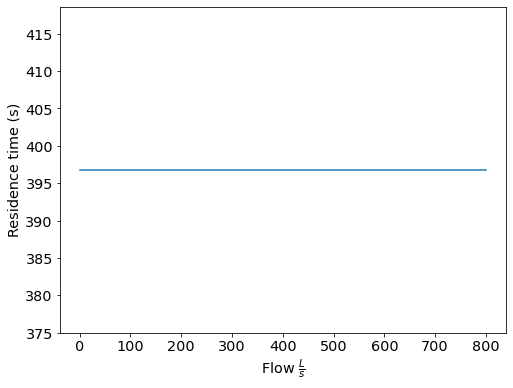

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


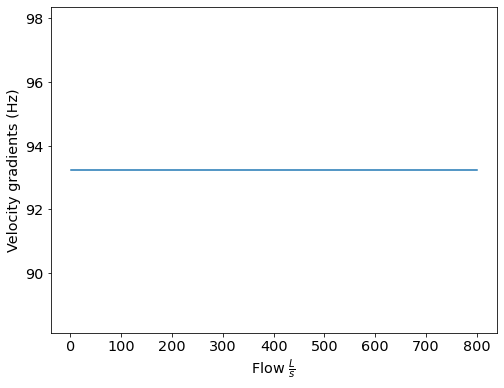

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


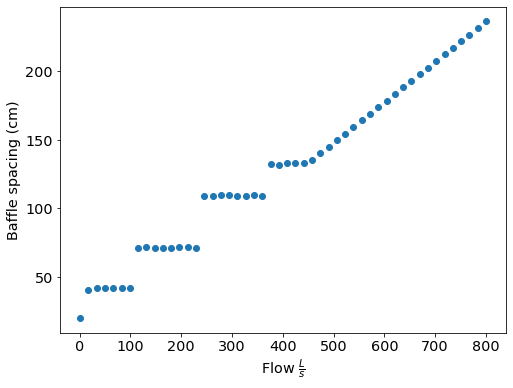

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


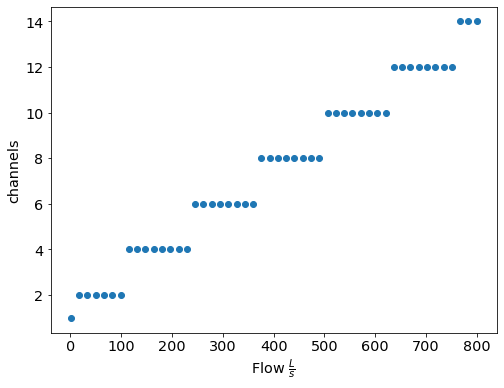

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


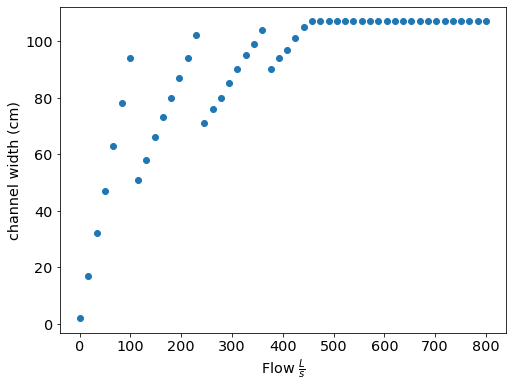

In [9]:
n = 50
mytemp = 15*u.degC
GraphQ = np.linspace(0.001,1,n)*800*u.L/u.s
myFs =np.empty(n, dtype=type(myF))
residencetimes = np.empty(n)*u.s
gradients = np.empty(n)*u.Hz
bafflespacing = np.empty(n)*u.cm
channels = np.empty(n)
channel_w = np.empty(n)*u.cm
for i in range(n):
  myFs[i] = ac.Flocculator(q=GraphQ[i],temp = mytemp,end_water_depth=4*u.m)
  residencetimes[i] = myFs[i].retention_time
  gradients[i] = myFs[i].vel_grad_avg
  bafflespacing[i] = myFs[i].baffle_s
  channels[i] = myFs[i].chan_n
  channel_w[i] = myFs[i].chan_w


plt.plot(GraphQ, residencetimes  ,'-');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('Residence time (s)');
plt.show()

plt.plot(GraphQ, gradients  ,'-');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('Velocity gradients (Hz)');
plt.show()

plt.plot(GraphQ, bafflespacing  ,'o');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('Baffle spacing (cm)');
plt.show()

plt.plot(GraphQ, channels  ,'o');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('channels');
plt.show()

plt.plot(GraphQ, channel_w  ,'o');
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('channel width (cm)');
plt.show()

# Small scale flocculators (1-5 Lps)

For these flocculators we begin with the assumption that the flow passage will be square to minimize surface area and loss of coagulant to the walls and the H/S ratio will be set to 6 so the jet expands fully before the next contraction.

$$S = \left( \frac{K}{2 H_e G_{CS}^2 \nu } \right)^\frac{1}{3} \frac{Q}{W}$$

$$S = W$$

$$ S = \frac{H_e}{\Pi_{H_eS}} $$

Now solve for the height of the flow, $H_e$.

$$\left(\frac{H_e}{\Pi_{H_eS}}\right)^2 = Q\left( \frac{K}{2 H_e G_{CS}^2 \nu } \right)^\frac{1}{3} $$

$${H_e}^\frac{7}{3} =\Pi_{H_eS}^2 Q\left( \frac{K}{2 G_{CS}^2 \nu } \right)^\frac{1}{3} $$

$${H_e} =\left[\left(\Pi_{H_eS}^2 Q\right)^3 \left( \frac{K}{2 G_{CS}^2 \nu } \right)\right]^\frac{1}{7} $$

$$G_{CS} = \frac{g h_{L_{floc}}}{\nu (G_{CS} \theta)}$$

In [10]:
Q = 1 * u.L/u.s
PiHS = 6*u.dimensionless
temp = 10 * u.degC
HL = 45 * u.cm
Gtheta = 30000
nu = ac.viscosity_kinematic_water(temp)
G = (u.gravity * HL/(nu * Gtheta)).to(1/u.s)
theta = Gtheta/G
K = baffle_k_e(ratio_vc_baffle,ratio_plane_jet_width,ratio_h_s)
def Floc_H_optimal(Q,K,G,PiHS,nu):
  return (((ratio_h_s**2 * Q)**3 * K /(2 * G**2 * nu)).to(u.m**7))**(1/7)

FlocH = Floc_H_optimal(Q,K,G,PiHS,nu)
FlocS = FlocH/PiHS
print('Flocculator H is',FlocH)
print('Flocculator S is',FlocS)

# Now find total length required for all of the back and forth flow.

theta_baffle = (FlocH * FlocS**2/Q).to(u.s)
print('Baffle space residence time',theta_baffle)

N_bafflespaces = round(theta/theta_baffle)
print('Number of baffle spaces is',N_bafflespaces)

totalbaffleL = N_bafflespaces*FlocS
print('Total baffle space length is',totalbaffleL)

# we want an even number of channels so that the water 
# enters the flocculator from the top and exits from the top. 
# We need to design an overflow to dump poorly flocculated water.

H_sed = 2 * u.m
H_floc_tank = H_sed + HL

N_channels = ac.round_step(totalbaffleL/H_floc_tank,2)
print('The number of channels is',N_channels)

Floc_tank_W = N_channels * FlocS
print('The floc tank width is',Floc_tank_W)

#Now that we have the number of channels we can go back and optimize the design

Flocculator H is 0.3546 meter
Flocculator S is 0.05909 meter
Baffle space residence time 1.238 second
Number of baffle spaces is 214 dimensionless
Total baffle space length is 12.65 meter
The number of channels is 6.0
The floc tank width is 0.3546 meter


We need to figure out what we compromise on.
What happens if we assume there are always 6 channels and then find the depth of the flocculator?
Should there be an even or odd number of spaces in each channel? (assume even)
This means the total number of spaces must be divisible by 12.
The number of 

In [11]:
N_channels = 6
N_bafflespaces = ac.round_step(theta/theta_baffle,N_channels*2)
print('Number of baffle spaces is',N_bafflespaces)

Floc_tank_W = N_channels * FlocS
H_floc_tank_active = FlocS * N_bafflespaces/N_channels
print('The active depth of the floc tank is',H_floc_tank_active)

theta_floc_tank_active = (H_floc_tank_active * FlocS**2 * N_channels * ratio_h_s/Q).to(u.s)
print('The active floc residence time is',theta_floc_tank_active)

HL_actual = (G**2 * nu * theta_floc_tank_active / u.gravity).to(u.cm)
print('the actual head loss would be',HL_actual)

Floc_tank_W = N_channels * FlocS
print('The floc tank width is',Floc_tank_W)

Number of baffle spaces is 216.0
The active depth of the floc tank is 2.127 meter
The active floc residence time is 189.2 second
the actual head loss would be 32.12 centimeter
The floc tank width is 0.3546 meter


# Class for small flocculator design

In [12]:
class FlocChamber():
  """Design an AguaClara flocculator chamber for flows between 1 and 5 L/s

  Design Inputs:
    - ``q (float * u.L/u.s)``: Flow rate (required)
    - ``temp (float * u.degC)``: Water temperature (optional, defaults to
      20°C)
    """

  def __init__(self, q=2*u.L/u.s, temp=10*u.degC, Gtheta=35000, HL=50 * u.cm,HW_sed=2*u.m,**kwargs):
    # The flow is the flow for all of the filters.
    self.q=q
    self.temp=temp
    self.ratio_h_s = 6*u.dimensionless
    self.HL = HL
    self.Gtheta = Gtheta
    self.HW_sed = HW_sed
    self.calculate_outputs()

  def calculate_outputs(self):
    self.nu = ac.viscosity_kinematic_water(self.temp)
    self.G = (u.gravity * self.HL/(self.nu * self.Gtheta)).to(1/u.s)
    self.theta = self.Gtheta/self.G
    venacontracta = 0.62
    ratio_plane_jet_width = 0.116
    ratio_vc_baffle = venacontracta**2
    self.K = baffle_k_e(ratio_vc_baffle,ratio_plane_jet_width,self.ratio_h_s)
    #The depth of water at the downstream end of the flocclator
    def Floc_H_optimal(Q,K,G,PiHS,nu):
      return (((ratio_h_s**2 * Q)**3 * K /(2 * G**2 * nu)).to(u.m**7))**(1/7)
    self.H = Floc_H_optimal(self.q,self.K,self.G,self.ratio_h_s,self.nu)
    self.S = self.H/self.ratio_h_s
    print('Flocculator H is',self.H.to(u.cm))
    print('Flocculator S is',self.S.to(u.cm))

    # Now find total length required for all of the back and forth flow.

    self.theta_baffle = (self.H * self.S**2/self.q).to(u.s)
    print('Baffle space residence time',self.theta_baffle)

    self.N_bafflespaces = round(self.theta/self.theta_baffle)
    print('Ideal number of baffle spaces is',self.N_bafflespaces)

    self.totalbaffleL = self.N_bafflespaces*self.S
    print('Total baffle space length is',self.totalbaffleL)

    # we want an even number of channels so that the water 
    # enters the flocculator from the top and exits from the top. 
    # We need to design an overflow to dump poorly flocculated water

    self.N_channels = ac.ceil_step(self.totalbaffleL/self.HW_sed,2)
    print('The number of channels is',self.N_channels)

    # Now calculate the required depth of the flocculator
    self.N_bafflespacesperchannel = ac.ceil_step(self.N_bafflespaces/self.N_channels,2)
    print('The number of spaces per channel is',self.N_bafflespacesperchannel)
    self.HW_floc_tank_outlet = self.N_bafflespacesperchannel * self.S
    self.HW_floc_tank_inlet = self.HW_floc_tank_outlet + self.HL
    print('The outlet water depth is',self.HW_floc_tank_outlet)
    print('The inlet water depth is',self.HW_floc_tank_inlet)






The following design assumes that the sed tank sets the maximum depth available for the flocclator. The actual flocculator is then designed to be shallower than that with the assumption that it is built on a 

In [13]:
myfloc = FlocChamber(q=1*u.L/u.s, temp=10*u.degC, Gtheta=35000, HL=50 * u.cm, HW_sed=1.6*u.m)

Flocculator H is 32.57 centimeter
Flocculator S is 5.428 centimeter
Baffle space residence time 0.9597 second
Ideal number of baffle spaces is 338 dimensionless
Total baffle space length is 18.35 meter
The number of channels is 12
The number of spaces per channel is 30
The outlet water depth is 1.628 meter
The inlet water depth is 2.128 meter


How does the optimal He vary with flow rate over a very wide range of flows? This is what causes the optimal geometry to change as the flow rate changes.

$${H_e} =\left[\left(\Pi_{H_eS}^2 Q\right)^3 \left( \frac{K}{2 G_{CS}^2 \nu } \right)\right]^\frac{1}{7} $$

5.413 minute
107.8 / second


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


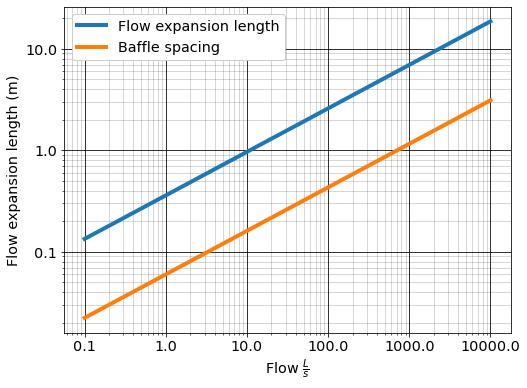

In [14]:
Q_graph = np.logspace(-1,4,50)*u.L/u.s
PiHS = 6*u.dimensionless
temp = 10 * u.degC
HL = 50 * u.cm
Gtheta = 35000
nu = ac.viscosity_kinematic_water(temp)
G = (u.gravity * HL/(nu * Gtheta)).to(1/u.s)
theta = Gtheta/G
print(theta.to(u.min))
print(G)
K = baffle_k_e(ratio_vc_baffle,ratio_plane_jet_width,ratio_h_s)

temp = 10 * u.degC

plt.loglog(Q_graph, Floc_H_optimal(Q_graph,K,G,PiHS,nu)  ,'-',linewidth=4);
plt.loglog(Q_graph, Floc_H_optimal(Q_graph,K,G,PiHS,nu)/PiHS  ,'-',linewidth=4);
plt.xlabel(r'Flow $\frac{L}{s}$');
plt.ylabel('Flow expansion length (m)');
# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='black', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.grid(b=True, which='minor', color='black', linestyle='-', alpha=0.2)
plt.legend(["Flow expansion length","Baffle spacing"])

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


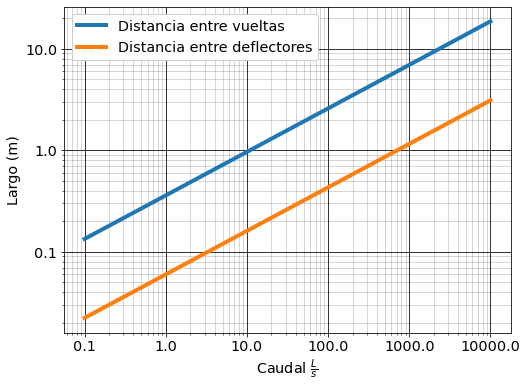

In [15]:
plt.loglog(Q_graph, Floc_H_optimal(Q_graph,K,G,PiHS,nu)  ,'-',linewidth=4);
plt.loglog(Q_graph, Floc_H_optimal(Q_graph,K,G,PiHS,nu)/PiHS  ,'-',linewidth=4);
plt.xlabel(r'Caudal $\frac{L}{s}$');
plt.ylabel('Largo (m)');
# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='black', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.grid(b=True, which='minor', color='black', linestyle='-', alpha=0.2)
plt.legend(["Distancia entre vueltas","Distancia entre deflectores"])

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.show()